## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load Data

In [2]:
cc_apps = pd.read_csv("data_clean.csv")

In [3]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             690 non-null    object 
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approval_status  690 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


In [4]:
cc_apps.head()

,male,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approval_status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


 ## Explore the Data

### Numeric Data

We will look at some of the summary statistics for the appropriate numeric features.

In [5]:
cols = ['age', 'income', 'credit_score', 'debt', 'years_employed']
cc_apps[cols].describe()

,age,income,credit_score,debt,years_employed
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568171,1017.385507,2.40000,4.758725,2.223406
std,11.853273,5210.102598,4.86294,4.978163,3.346513
min,13.750000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,0.000000,0.00000,1.000000,0.165000
50%,28.625000,5.000000,0.00000,2.750000,1.000000
75%,37.707500,395.500000,3.00000,7.207500,2.625000
max,80.250000,100000.000000,67.00000,28.000000,28.500000


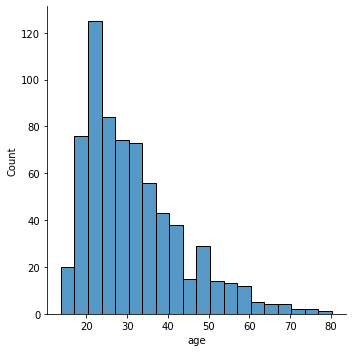

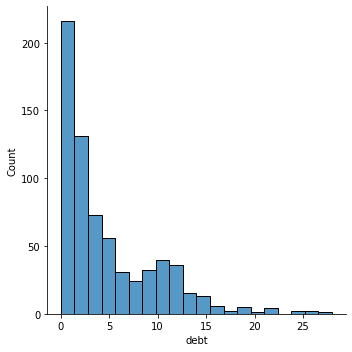

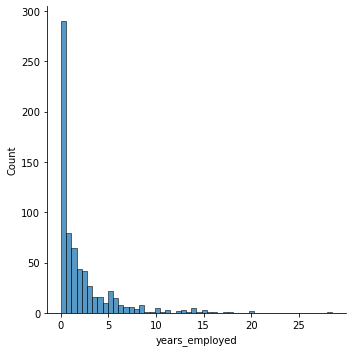

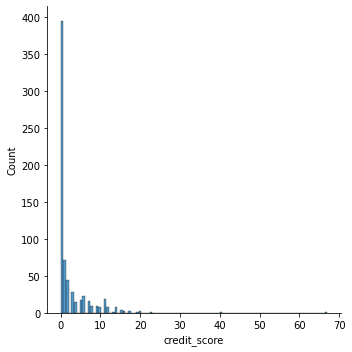

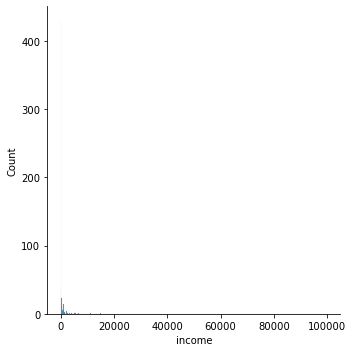

In [6]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.displot(col)
    plt.show()

plotDistPlot(cc_apps['age'])
plotDistPlot(cc_apps['debt'])
plotDistPlot(cc_apps['years_employed'])
plotDistPlot(cc_apps['credit_score'])
plotDistPlot(cc_apps['income'])

It appears that most of the data is skewed to the right.

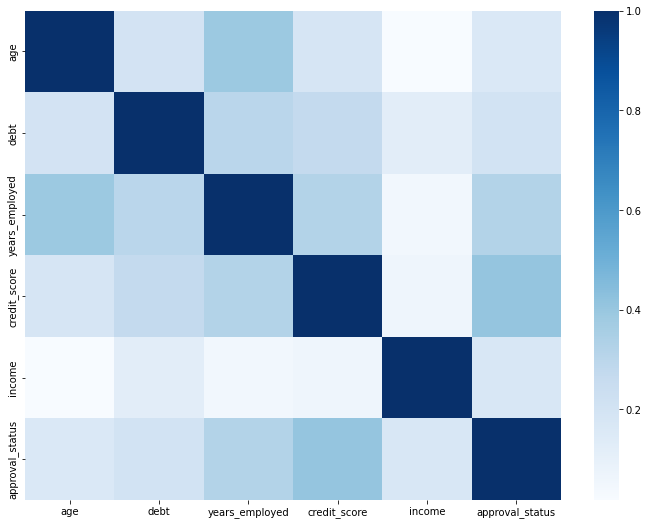

In [7]:
corrmat = cc_apps.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap = 'Blues');

It appears that in terms of response variable, `approval_status`, there is moderate correlation between `credit_score` and `years_employed`. This makes sense intuitively, sense the better the credit score, the more likely you are to get approval. Likewise, the longer you've worked indicates that you're more likely to be able to pay off a credit card.

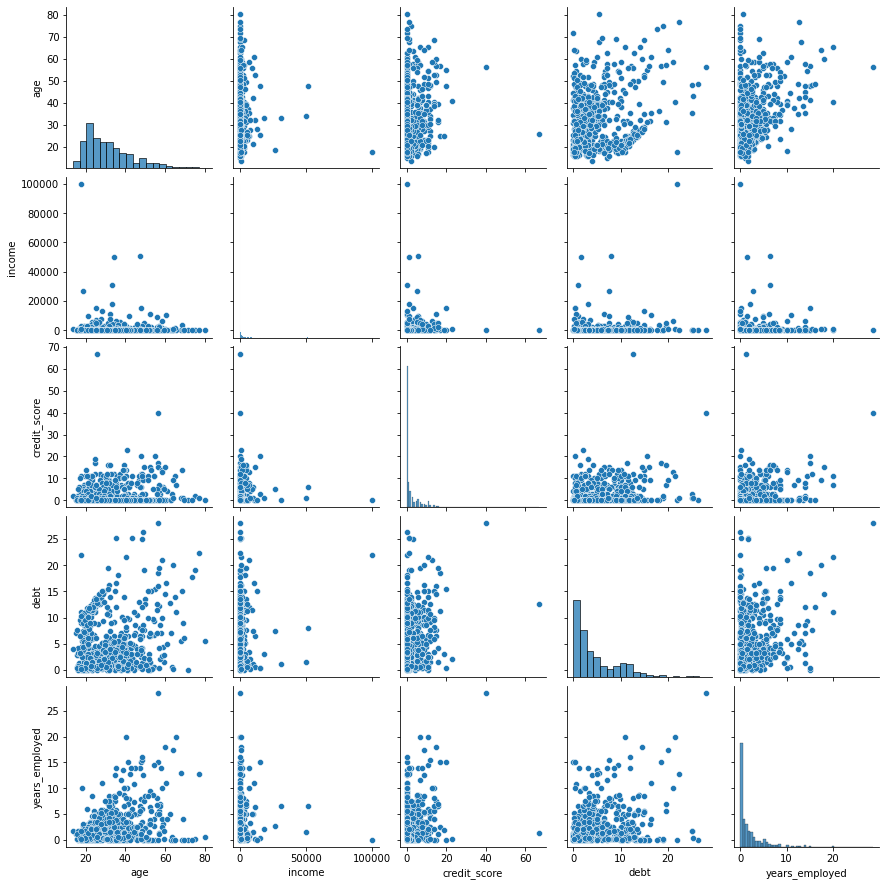

In [8]:
cols = ['age', 'income', 'credit_score', 'debt', 'years_employed']
_ = sns.pairplot(cc_apps[cols], height = 2.5)
plt.show();

### Categorical Data

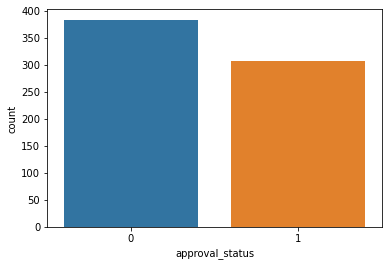

In [9]:
_ = sns.countplot(data = cc_apps, x = 'approval_status')

It appears that were fewer applications approved than approved.  

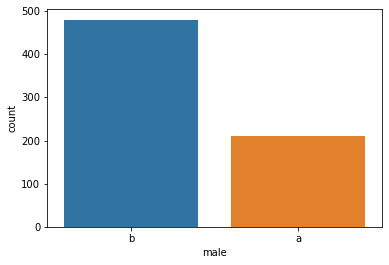

In [10]:
_ = sns.countplot(data = cc_apps, x = 'male')

Due to the anonimity of the data, we cannot tell what `b` and `a` represent; however, more people with label `b` applied for credit card applications and those with label `a`.

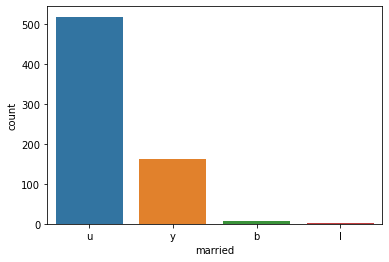

In [11]:
_ = sns.countplot(data = cc_apps, x = 'married')

`u` and `y` had the most amount of applications for credit cards where as `b` and `l` were very little.

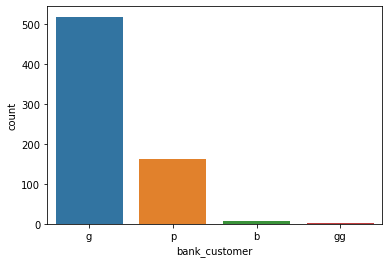

In [12]:
_ = sns.countplot(data = cc_apps, x = 'bank_customer')

This is similar to what we saw with `married` labels; however, it seems a large majoirty of applications come from bank customers with label `g`. 

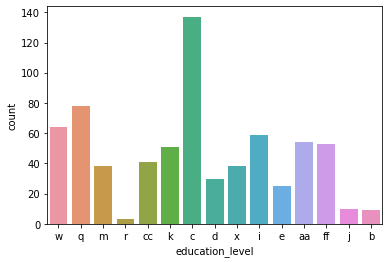

In [13]:
_ = sns.countplot(data = cc_apps, x = 'education_level')

There seems to be a wide variety of education levels from customers who are seeking credit cards. A large amount comes from those with label `c`. This makes sense since we know that many people apply for credit cards from a wide vareity of education levels.

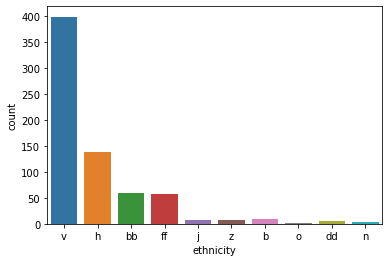

In [14]:
_ = sns.countplot(data = cc_apps, x = 'ethnicity')

It appears as if a large majority of credit card applications are coming from ethnicity `v`. 

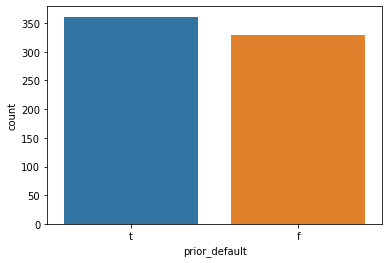

In [15]:
_ = sns.countplot(data = cc_apps, x = 'prior_default')

The number of people who have or have not defaulted are close to one another. I look forward to seeing how this will play out with the credit approval.

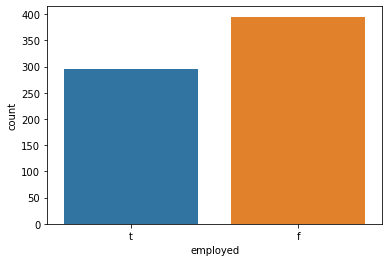

In [16]:
_ = sns.countplot(data = cc_apps, x = 'employed')

There are more customers with the `f` label  than the `t` applying for credit cards.

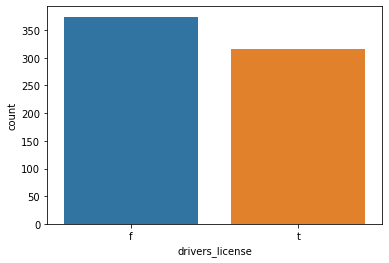

In [17]:
_ = sns.countplot(data = cc_apps, x = 'drivers_license')

Thisi is a category that may not prove too useful for building our model. We may drop this during preprocessing.

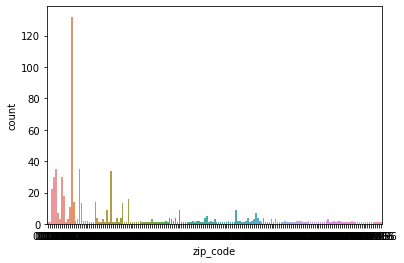

In [18]:
_ = sns.countplot(data = cc_apps, x = 'zip_code')

Just like `drivers_license`, `zip_code` may not be too useful. This is another variable that we may elect to drop during preprocessing.